In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
%matplotlib inline
import os

In [2]:
dirpath ='/Users/abhinay/Documents/cs/projects/fantasy-hockey-analytics/standings-snapshot-analysis/data-files'
list_files = os.listdir(dirpath) # dir is your directory path
number_files = len(list_files)

In [3]:
datelist = pd.date_range("2017-10-17", periods=number_files-1).tolist()
dates = list((dobj.date().strftime('%Y-%m-%d') for dobj in datelist))
stats = pd.DataFrame()

In [4]:
for date in dates:
    path ='~/Documents/cs/projects/fantasy-hockey-analytics/standings-snapshot-analysis/data-files/{}.csv'.format(date)
    frame = pd.read_csv(path)
    # Renaming the columns for clarity
    frame.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)
    frame['date'] = date
    stats = pd.concat([stats, frame], ignore_index=True)

In [5]:
SOG = pd.DataFrame()
for name in stats['Team Name'].unique():
    df = stats[stats['Team Name']== name][['date','SOG']]
    df.set_index(df['date'], inplace=True)
    df.drop('date', axis=1, inplace=True)
    df.rename(columns={'SOG':name}, inplace=True)
    SOG=pd.concat([SOG, df], axis=1)

SOG

,/u/BuffaloSobbers1,/u/xskilledsnipax,/u/Hotwired38,/u/canadaq,/u/crayfishparty2,/u/joey3140,/u/TheManagement,/u/Dangled0re,/u/xprmnts,/u/acegfx,/u/scomar201,/u/rjupp24,/u/flykessel,Huge's Real Gud Pros,/u/mcgrevin,/u/phoninghome,/u/Truxa,/u/idrisk2000,u/ctrl_alt_karma,/u/ninjaemperor
date,,,,,,,,,,,,,,,,,,,,
2017-10-17,210,236,159,204,212,194,179,189,206,168,157,216,126,184,174,155,204,173,159,158
2017-10-18,236,257,186,236,245,215,213,211,232,182,181,238,147,202,203,181,224,201,180,183
2017-10-19,238,264,193,243,249,219,215,219,254,196,189,241,152,204,218,182,237,208,191,183
2017-10-20,274,281,214,261,275,241,230,238,285,218,220,267,170,214,243,191,272,239,193,198
2017-10-21,284,300,227,278,293,250,240,249,299,229,231,279,185,232,259,217,300,252,212,203
2017-10-22,308,329,261,304,327,288,274,277,328,250,256,312,202,248,279,247,324,274,237,234
2017-10-23,308,329,264,305,330,289,274,277,331,253,256,312,203,250,281,247,328,278,246,234
2017-10-24,317,335,264,310,332,295,282,282,341,267,266,321,206,253,287,247,332,278,251,235
2017-10-25,342,365,287,329,355,325,314,306,367,294,286,334,231,270,324,265,354,303,273,256


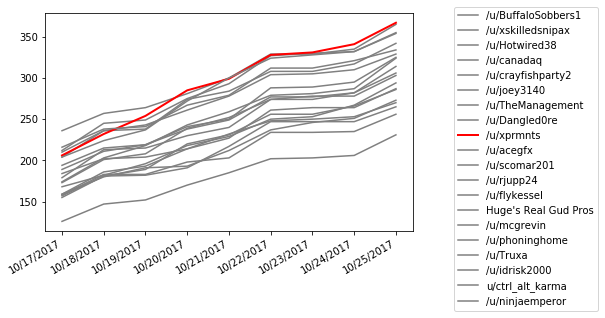

In [7]:
x = [DT.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for name in SOG.columns:
    if name == '/u/xprmnts':
        plt.plot(x,SOG[name],'r-',lw=2,)
    else:
        plt.plot(x,SOG[name],'grey')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.gcf().autofmt_xdate()
plt.tight_layout()
